## Christos Bintsis 12025416

# Assignment 3: Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

elections = pd.read_excel("C:\\Users\\user\\Desktop\\Uni Wien\\Masterstudium\\Intro to DH Tools and Methods (DH Skilss I)\\3. Assignment\\us_elections.xlsx")

In [2]:
elections.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
elections.head(10)

,year,state,state_po,office,candidate,party_detailed,writein,candidatevotes,totalvotes
0,1976,ALABAMA,AL,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,0.0,659170,1182850
1,1976,ALABAMA,AL,US PRESIDENT,"FORD, GERALD",REPUBLICAN,0.0,504070,1182850
2,1976,ALABAMA,AL,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,0.0,9198,1182850
3,1976,ALABAMA,AL,US PRESIDENT,"BUBAR, BENJAMIN \\""BEN\""\""""",PROHIBITION,0.0,6669,1182850
4,1976,ALABAMA,AL,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,0.0,1954,1182850
5,1976,ALABAMA,AL,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,0.0,1481,1182850
6,1976,ALABAMA,AL,US PRESIDENT,NaN,NaN,1.0,308,1182850
7,1976,ALASKA,AK,US PRESIDENT,"FORD, GERALD",REPUBLICAN,0.0,71555,123574
8,1976,ALASKA,AK,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,0.0,44058,123574
9,1976,ALASKA,AK,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,0.0,6785,123574


In [4]:
elections.tail(10)

,year,state,state_po,office,candidate,party_detailed,writein,candidatevotes,totalvotes
4277,2020,WISCONSIN,WI,US PRESIDENT,"WEST, KANYE",THE BIRTHDAY PARTY,1.0,411,3298041
4278,2020,WISCONSIN,WI,US PRESIDENT,"CHARLES, MARK",INDEPENDENT,1.0,52,3298041
4279,2020,WISCONSIN,WI,US PRESIDENT,NaN,NaN,1.0,6367,3298041
4280,2020,WYOMING,WY,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,0.0,73491,278503
4281,2020,WYOMING,WY,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,0.0,193559,278503
4282,2020,WYOMING,WY,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,0.0,5768,278503
4283,2020,WYOMING,WY,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,0.0,2208,278503
4284,2020,WYOMING,WY,US PRESIDENT,NaN,NaN,1.0,1739,278503
4285,2020,WYOMING,WY,US PRESIDENT,OVERVOTES,NaN,0.0,279,278503
4286,2020,WYOMING,WY,US PRESIDENT,UNDERVOTES,NaN,0.0,1459,278503


**Total Number of Votes per Election**

In [5]:
votes_pe = elections[['year', 'totalvotes']]\
.groupby(['year']).sum()

votes_pe.head(12)

,totalvotes
year,
1976,605944064
1980,663902096
1984,609936856
1988,537099170
1992,770486377
1996,728343795
2000,783441739
2004,768259747
2008,992684830


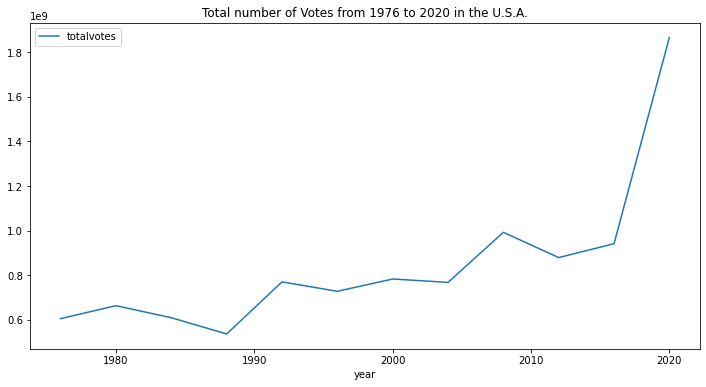

In [6]:
votes_pe.plot(title = 'Total number of Votes from 1976 to 2020 in the U.S.A.', figsize = (12,6));

**Total Numbers of Votes per Election and per State**

In [7]:
votes_pe_ps = elections[['year','state','totalvotes']]\
.groupby(['year','state']).mean().reset_index()
votes_pe_ps.head(10)

,year,state,totalvotes
0,1976,ALABAMA,1182850
1,1976,ALASKA,123574
2,1976,ARIZONA,742719
3,1976,ARKANSAS,767535
4,1976,CALIFORNIA,7803770
5,1976,COLORADO,1081440
6,1976,CONNECTICUT,1386355
7,1976,DELAWARE,235642
8,1976,DISTRICT OF COLUMBIA,168830
9,1976,FLORIDA,3150631


**Democrats vs Republicans: What was their Difference in Votes in every Presidential Election from 1976 to 2020?**

In [8]:
dem_rep = elections[['year', 'party_detailed', 'candidatevotes']]
dem_rep.head(10)

,year,party_detailed,candidatevotes
0,1976,DEMOCRAT,659170
1,1976,REPUBLICAN,504070
2,1976,AMERICAN INDEPENDENT PARTY,9198
3,1976,PROHIBITION,6669
4,1976,COMMUNIST PARTY USE,1954
5,1976,LIBERTARIAN,1481
6,1976,NaN,308
7,1976,REPUBLICAN,71555
8,1976,DEMOCRAT,44058
9,1976,LIBERTARIAN,6785


In [9]:
dem_rep1 = dem_rep[(dem_rep.party_detailed == 'DEMOCRAT') | (dem_rep.party_detailed == 'REPUBLICAN')]
dem_rep1.head(10)

,year,party_detailed,candidatevotes
0,1976,DEMOCRAT,659170
1,1976,REPUBLICAN,504070
7,1976,REPUBLICAN,71555
8,1976,DEMOCRAT,44058
11,1976,REPUBLICAN,418642
12,1976,DEMOCRAT,295602
19,1976,DEMOCRAT,498604
20,1976,REPUBLICAN,267903
23,1976,REPUBLICAN,3882244
24,1976,DEMOCRAT,3742284


In [10]:
dem_rep1.groupby('party_detailed').candidatevotes.sum()

party_detailed
DEMOCRAT      635082737
REPUBLICAN    632502462
Name: candidatevotes, dtype: int64

In [11]:
big_parties = dem_rep1.pivot_table('candidatevotes', index='year', columns='party_detailed', aggfunc=sum)
big_parties.head(10)

party_detailed,DEMOCRAT,REPUBLICAN
year,,
1976,40680446,38870893
1980,35480948,43642639
1984,37449813,54166829
1988,41716679,48642640
1992,44856747,38798913
1996,47295351,39003697
2000,49662314,50311372
2004,57449547,61872711
2008,69338846,59613835


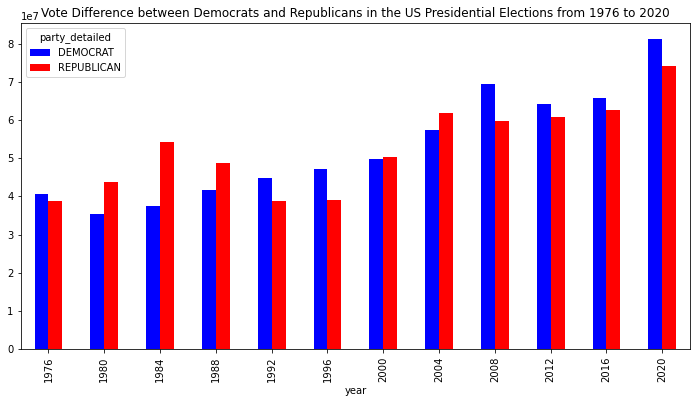

In [12]:
big_parties.plot.bar(title ='Vote Difference between Democrats and Republicans in the US Presidential Elections from 1976 to 2020', figsize=(12,6), color = ['blue', 'red']);

**What was the difference between the first and the second election of each President?**

**Ronald Reagan (Republican)**

In [13]:
comparison = elections[['year', 'candidatevotes']]
comparison.head(10)

,year,candidatevotes
0,1976,659170
1,1976,504070
2,1976,9198
3,1976,6669
4,1976,1954
5,1976,1481
6,1976,308
7,1976,71555
8,1976,44058
9,1976,6785


In [14]:
elections_reagan = comparison[(elections.candidate == 'REAGAN, RONALD')]
elections_reagan.head(10)

,year,candidatevotes
332,1980,654192
342,1980,86112
347,1980,529688
355,1980,403164
362,1980,4522994
369,1980,652264
377,1980,677210
383,1980,111252
389,1980,23313
397,1980,2046951


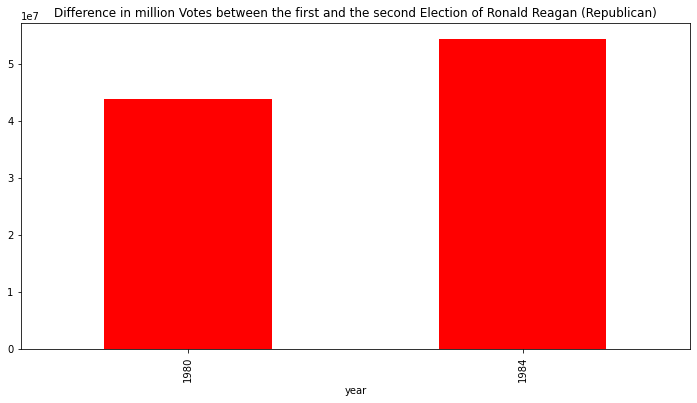

In [15]:
elections_reagan.groupby('year').candidatevotes.sum()\
.plot.bar(title = 'Difference in million Votes between the first and the second Election of Ronald Reagan (Republican)', figsize = (12,6), color = 'red');

**Barack H. Obama (Democrat)**

In [16]:
elections_obama = comparison[(elections.candidate == 'OBAMA, BARACK H.')]
elections_obama.head(10)

,year,candidatevotes
2729,2008,813479
2733,2008,123594
2739,2008,1034707
2745,2008,422310
2751,2008,8274473
2758,2008,1288576
2774,2008,997772
2778,2008,255459
2785,2008,245800
2790,2008,4282074


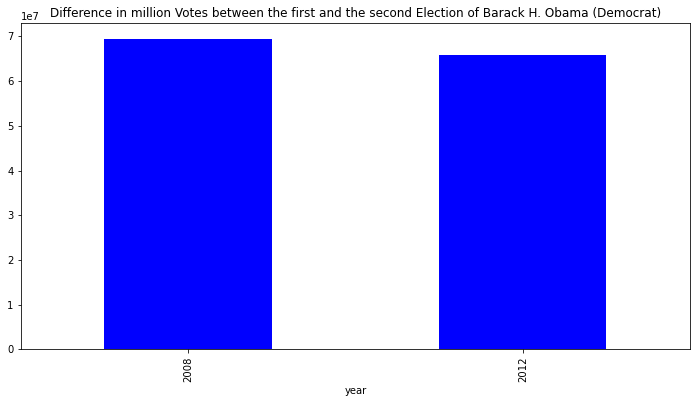

In [17]:
elections_obama.groupby('year').candidatevotes.sum()\
.plot.bar(title = 'Difference in million Votes between the first and the second Election of Barack H. Obama (Democrat)', figsize = (12,6), color = 'blue');

**What was the Percentage of the Left Political Parties in the USA from 1976 until the end of the Cold War (1991)?**

In [18]:
parties = elections[['year', 'party_detailed', 'candidatevotes', 'totalvotes']]
parties.head(10)

,year,party_detailed,candidatevotes,totalvotes
0,1976,DEMOCRAT,659170,1182850
1,1976,REPUBLICAN,504070,1182850
2,1976,AMERICAN INDEPENDENT PARTY,9198,1182850
3,1976,PROHIBITION,6669,1182850
4,1976,COMMUNIST PARTY USE,1954,1182850
5,1976,LIBERTARIAN,1481,1182850
6,1976,NaN,308,1182850
7,1976,REPUBLICAN,71555,123574
8,1976,DEMOCRAT,44058,123574
9,1976,LIBERTARIAN,6785,123574


In [19]:
left_cold_war = parties[(parties.year <= 1991) & ((parties.party_detailed == 'COMMUNIST PARTY USE') | (parties.party_detailed == 'SOCIALIST WORKERS') | (parties.party_detailed == 'SOCIALIST LABOR') | (parties.party_detailed == 'SOCIALIST'))]
left_cold_war.tail(10)

,year,party_detailed,candidatevotes,totalvotes
1184,1988,SOCIALIST WORKERS,2298,3099553
1191,1988,SOCIALIST WORKERS,344,521387
1203,1988,SOCIALIST WORKERS,3287,6485683
1214,1988,SOCIALIST WORKERS,347,297261
1244,1988,SOCIALIST WORKERS,130,404622
1245,1988,SOCIALIST,96,404622
1270,1988,SOCIALIST WORKERS,209,647008
1271,1988,SOCIALIST,129,647008
1281,1988,SOCIALIST WORKERS,113,243328
1292,1988,SOCIALIST WORKERS,1290,1865253


In [20]:
left_cold_war['percent'] = left_cold_war['candidatevotes']/left_cold_war['totalvotes']

<ipython-input-20-af9f7e4dab62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_cold_war['percent'] = left_cold_war['candidatevotes']/left_cold_war['totalvotes']


In [21]:
left_cold_war.head(10)

,year,party_detailed,candidatevotes,totalvotes,percent
4,1976,COMMUNIST PARTY USE,1954,1182850,0.001652
15,1976,SOCIALIST WORKERS,928,742719,0.001249
35,1976,SOCIALIST WORKERS,1122,1081440,0.001038
37,1976,COMMUNIST PARTY USE,403,1081440,0.000373
49,1976,SOCIALIST LABOR,86,235642,0.000365
73,1976,COMMUNIST PARTY USE,9250,4721282,0.001959
76,1976,SOCIALIST WORKERS,3615,4721282,0.000766
77,1976,SOCIALIST LABOR,2422,4721282,0.000513
82,1976,SOCIALIST WORKERS,5695,2220362,0.002565
89,1976,COMMUNIST PARTY USE,551,1279303,0.000431


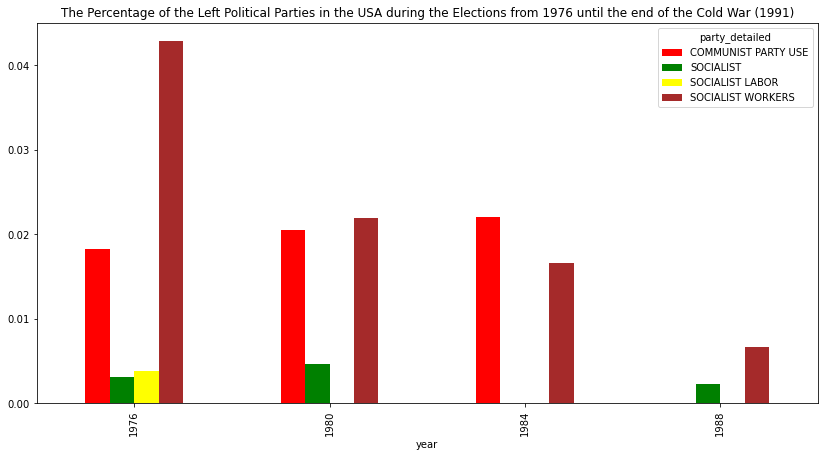

In [22]:
left_cold_war.pivot_table('percent', index='year', columns='party_detailed', aggfunc=sum)\
.plot.bar(title = 'The Percentage of the Left Political Parties in the USA during the Elections from 1976 until the end of the Cold War (1991)', figsize = (14,7),color = ['red', 'green', 'yellow', 'brown']);

****************************************************************************************************************************

# Assignment 4

## Who were the winner Presidents and Vice Presidents after each election from 1976 to 2020? How many votes did they get?

In [23]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States")
results = dfs[1][['Election','President', 'Vice President']]
results.head()

,Election,President,Vice President
0,1788–89,George Washington,John Adams[c]
1,1792,George Washington,John Adams[c]
2,1796,John Adams,Thomas Jefferson[d]
3,1800,Thomas Jefferson,Aaron Burr
4,1804,Thomas Jefferson,George Clinton[e]


In [24]:
results = results.iloc[-13:-1, :]
results.Election = results.Election.astype('int64')
results.rename(columns={'Election':'election', 'President':'president', 'Vice President':'vice_president'}, inplace=True)
results

,election,president,vice_president
70,1976,Jimmy Carter,Walter Mondale
71,1980,Ronald Reagan,George H. W. Bush
72,1984,Ronald Reagan,George H. W. Bush
73,1988,George H. W. Bush,Dan Quayle
74,1992,Bill Clinton,Al Gore
75,1996,Bill Clinton,Al Gore
76,2000,George W. Bush,Dick Cheney
77,2004,George W. Bush,Dick Cheney
78,2008,Barack Obama,Joe Biden
79,2012,Barack Obama,Joe Biden


In [25]:
first_name = results.president.str.rsplit(' ', n=1, expand=True)[0]
last_name = results.president.str.rsplit(' ', n=1, expand=True)[1]
results.president = last_name + ', ' + first_name
results['president'] = results['president'].str.upper()
results

,election,president,vice_president
70,1976,"CARTER, JIMMY",Walter Mondale
71,1980,"REAGAN, RONALD",George H. W. Bush
72,1984,"REAGAN, RONALD",George H. W. Bush
73,1988,"BUSH, GEORGE H. W.",Dan Quayle
74,1992,"CLINTON, BILL",Al Gore
75,1996,"CLINTON, BILL",Al Gore
76,2000,"BUSH, GEORGE W.",Dick Cheney
77,2004,"BUSH, GEORGE W.",Dick Cheney
78,2008,"OBAMA, BARACK",Joe Biden
79,2012,"OBAMA, BARACK",Joe Biden


In [26]:
first_name = results.vice_president.str.rsplit(' ', n=1, expand=True)[0]
last_name = results.vice_president.str.rsplit(' ', n=1, expand=True)[1]
results.vice_president = last_name + ', ' + first_name
results['vice_president'] = results['vice_president'].str.upper()
results

,election,president,vice_president
70,1976,"CARTER, JIMMY","MONDALE, WALTER"
71,1980,"REAGAN, RONALD","BUSH, GEORGE H. W."
72,1984,"REAGAN, RONALD","BUSH, GEORGE H. W."
73,1988,"BUSH, GEORGE H. W.","QUAYLE, DAN"
74,1992,"CLINTON, BILL","GORE, AL"
75,1996,"CLINTON, BILL","GORE, AL"
76,2000,"BUSH, GEORGE W.","CHENEY, DICK"
77,2004,"BUSH, GEORGE W.","CHENEY, DICK"
78,2008,"OBAMA, BARACK","BIDEN, JOE"
79,2012,"OBAMA, BARACK","BIDEN, JOE"


In [27]:
results.president[73] = 'BUSH, GEORGE H.W.'
results.president[78] = 'OBAMA, BARACK H.'
results.president[79] = 'OBAMA, BARACK H.'
results.president[80] = 'TRUMP, DONALD J.'
results.president[81] = 'BIDEN, JOSEPH R. JR'

<ipython-input-27-8ca6705fd277>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.president[73] = 'BUSH, GEORGE H.W.'
<ipython-input-27-8ca6705fd277>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.president[78] = 'OBAMA, BARACK H.'
<ipython-input-27-8ca6705fd277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.president[79] = 'OBAMA, BARACK H.'
<ipython-input-27-8ca6705fd277>:4: SettingWithCopyWarning: 
A valu

In [28]:
results

,election,president,vice_president
70,1976,"CARTER, JIMMY","MONDALE, WALTER"
71,1980,"REAGAN, RONALD","BUSH, GEORGE H. W."
72,1984,"REAGAN, RONALD","BUSH, GEORGE H. W."
73,1988,"BUSH, GEORGE H.W.","QUAYLE, DAN"
74,1992,"CLINTON, BILL","GORE, AL"
75,1996,"CLINTON, BILL","GORE, AL"
76,2000,"BUSH, GEORGE W.","CHENEY, DICK"
77,2004,"BUSH, GEORGE W.","CHENEY, DICK"
78,2008,"OBAMA, BARACK H.","BIDEN, JOE"
79,2012,"OBAMA, BARACK H.","BIDEN, JOE"


In [29]:
elections = pd.merge(elections, results, left_on='year', right_on='election')


In [30]:
elections.columns

Index(['year', 'state', 'state_po', 'office', 'candidate', 'party_detailed',
       'writein', 'candidatevotes', 'totalvotes', 'election', 'president',
       'vice_president'],
      dtype='object')

In [31]:
votes = elections[elections.candidate == elections.president]

In [32]:
total_votes = votes[['year','president', 'vice_president', 'candidatevotes','totalvotes']]\
.groupby(['year','president', 'vice_president']).sum()
total_votes

,,,candidatevotes,totalvotes
year,president,vice_president,,
1976,"CARTER, JIMMY","MONDALE, WALTER",40825839,88269606
1980,"REAGAN, RONALD","BUSH, GEORGE H. W.",43898770,92698810
1984,"REAGAN, RONALD","BUSH, GEORGE H. W.",54455073,99461671
1988,"BUSH, GEORGE H.W.","QUAYLE, DAN",48886097,98072508
1992,"CLINTON, BILL","GORE, AL",44954303,111679212
1996,"CLINTON, BILL","GORE, AL",47401898,102828947
2000,"BUSH, GEORGE W.","CHENEY, DICK",50456169,112554197
2004,"BUSH, GEORGE W.","CHENEY, DICK",62028285,129797716
2008,"OBAMA, BARACK H.","BIDEN, JOE",69498459,139141272


## What was the ratio of each winner President and Vice President?

In [33]:
highest_ratio = (total_votes.candidatevotes / total_votes.totalvotes)\
.sort_values(ascending=False)
highest_ratio

year  president            vice_president    
1984  REAGAN, RONALD       BUSH, GEORGE H. W.    0.547498
2020  BIDEN, JOSEPH R. JR  HARRIS, KAMALA        0.512645
2008  OBAMA, BARACK H.     BIDEN, JOE            0.499481
1988  BUSH, GEORGE H.W.    QUAYLE, DAN           0.498469
2012  OBAMA, BARACK H.     BIDEN, JOE            0.483643
2004  BUSH, GEORGE W.      CHENEY, DICK          0.477884
1980  REAGAN, RONALD       BUSH, GEORGE H. W.    0.473563
1976  CARTER, JIMMY        MONDALE, WALTER       0.462513
1996  CLINTON, BILL        GORE, AL              0.460978
2000  BUSH, GEORGE W.      CHENEY, DICK          0.448283
2016  TRUMP, DONALD J.     PENCE, MIKE           0.427392
1992  CLINTON, BILL        GORE, AL              0.402531
dtype: float64

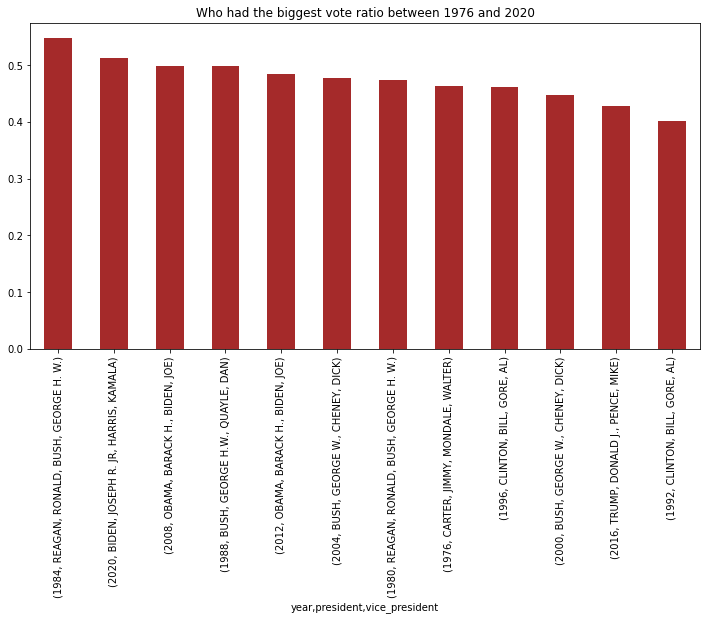

In [34]:
highest_ratio.plot.bar(title ='Who had the biggest vote ratio between 1976 and 2020', figsize=(12,6), color = ['brown']);

## Democrats or Republicans? Which one of these political parties supports each state?

In [35]:
votes['ratio'] = votes.candidatevotes / votes.totalvotes

<ipython-input-35-ae41483b1057>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes['ratio'] = votes.candidatevotes / votes.totalvotes


In [36]:
dem = votes[votes.party_detailed == 'DEMOCRAT'][['state','ratio']]\
.groupby('state').mean().sort_values(by='ratio', ascending=False)
dem.head()

,ratio
state,
DISTRICT OF COLUMBIA,0.878303
HAWAII,0.600606
MASSACHUSETTS,0.586583
RHODE ISLAND,0.578750
MARYLAND,0.577262


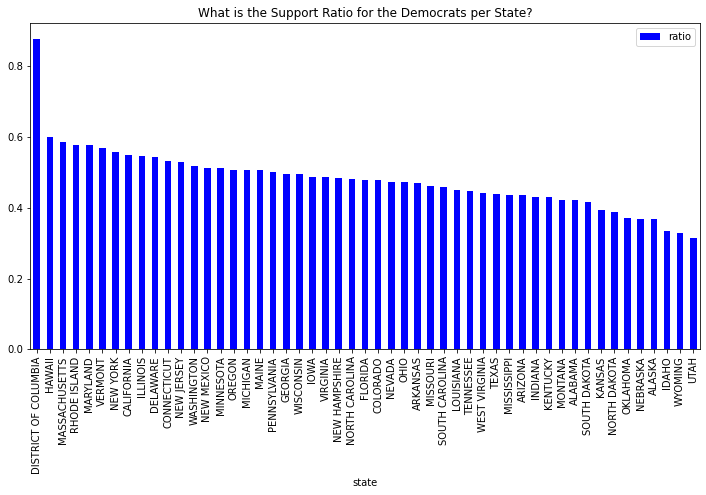

In [37]:
dem.plot.bar(title ='What is the Support Ratio for the Democrats per State?', figsize=(12,6), color = ['blue']);

In [38]:
rep = votes[votes.party_detailed == 'REPUBLICAN'][['state','ratio']]\
.groupby('state').mean().sort_values(by='ratio', ascending=False)
rep.head()

,ratio
state,
WYOMING,0.665075
UTAH,0.662342
IDAHO,0.659537
NEBRASKA,0.638591
OKLAHOMA,0.630401


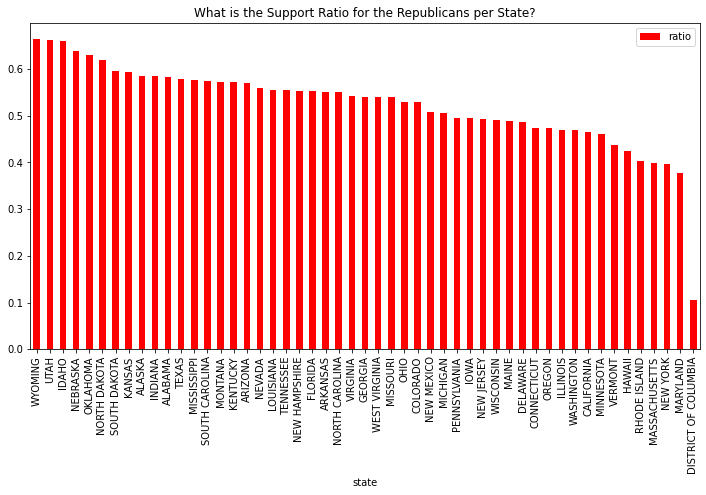

In [39]:
rep.plot.bar(title ='What is the Support Ratio for the Republicans per State?', figsize=(12,6), color = ['red']);

## Who was the US President between 1976 and 2020?

In [40]:
# Try a date and see the US President on that year!
w = input("Enter a year between 1976 and 2020: ")
winner = int(w)
print(winner)
if winner <= 1975:
    print ("Please enter a year between 1976 and 2020")
elif winner <= 1979:
    print ("Jimmy Carter")
elif winner <= 1987:
    print("Ronald Reigan")
elif winner <= 1991:
    print("George H. W. Bush")
elif winner <= 1999:
    print("Bill Clinton")
elif winner <= 2007:
    print("Georg W. Bush")
elif winner <= 2015:
    print ("Barack H. Obama")
elif winner <= 2019:
    print ("Donald J. Trump")
elif winner == 2020:
    print ("Joe Biden")
elif winner >=1975:
    print ("Please enter a year between 1976 and 2020")
else: 
    print ("Please enter a year between 1976 and 2020")

Enter a year between 1976 and 2020:  2017


2017
Donald J. Trump


## "Mr. Gorbachev, tear down this wall!" A short textual analysis of Ronald Reagan's speech to the people of West Berlin at the Brandenburg Gate, Federal Republic of Germany on June 12, 1987

In [41]:
import string
from collections import Counter
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\Uni Wien\\Masterstudium\\Intro to DH Tools and Methods (DH Skilss I)\\3. Assignment\\reagan_speech_berlin.xlsx")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Berlin Speech  1 non-null      object
dtypes: object(1)
memory usage: 136.0+ bytes


In [44]:
df['speech'] = df['Berlin Speech'] + " "

In [45]:
text = df['speech'].sum()
text[0:700]

"Chancellor Kohl, Governing Mayor Diepgen, ladies and gentlemen: Twenty-four years ago, President John F. Kennedy visited Berlin, speaking to the people of this city and the world at the City Hall. Well, since then two other presidents have come, each in his turn, to Berlin. And today I, myself, make my second visit to your city. We come to Berlin, we American presidents, because it's our duty to speak, in this place, of freedom. But I must confess, we're drawn here by other things as well: by the feeling of history in this city, more than 500 years older than our own nation; by the beauty of the Grunewald and the Tiergarten; most of all, by your courage and determination. Perhaps the compose"

In [46]:
print(len(text))

15514


In [47]:
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en
stopwords.extend(['-','', '”','and'])

In [48]:
split_text = text.split()
split_text = [l.strip().lower() for l in split_text]
split_text = [l.strip(string.punctuation) for l in split_text]
split_text = [l for l in split_text if l not in stopwords]
split_text[0:20]

['chancellor',
 'kohl',
 'governing',
 'mayor',
 'diepgen',
 'ladies',
 'gentlemen',
 'twenty-four',
 'years',
 'ago',
 'president',
 'john',
 'f',
 'kennedy',
 'visited',
 'berlin',
 'speaking',
 'people',
 'city',
 'world']

In [49]:
word_number = Counter(split_text)
word_number.most_common(10)

[('berlin', 28),
 ('city', 21),
 ('freedom', 17),
 ('world', 15),
 ('today', 15),
 ('west', 15),
 ('one', 13),
 ('europe', 11),
 ('wall', 11),
 ('east', 10)]

In [50]:
frequency = ' '.join(split_text)
wc = WordCloud().generate(frequency)

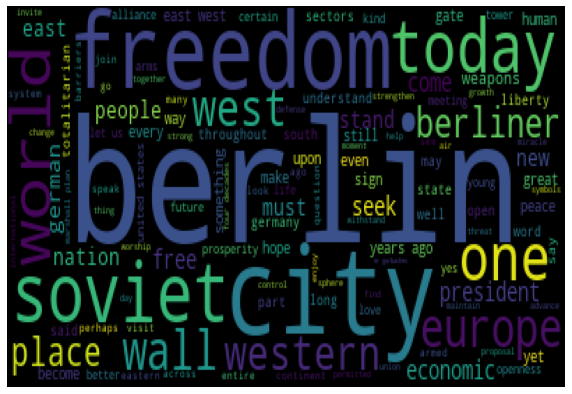

In [51]:
wc = WordCloud().generate_from_text(frequency)
plt.figure(figsize = (10,7))
plt.imshow(wc, aspect='auto')
plt.axis('off')
plt.show()

## WordCloud into Germany's shape

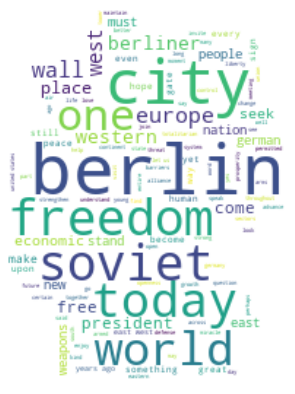

In [52]:
from PIL import Image
mask = np.array(Image.open('C:\\Users\\user\\Desktop\\Uni Wien\\Masterstudium\\Intro to DH Tools and Methods (DH Skilss I)\\3. Assignment\\cold_war_germany.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate_from_text(frequency)
plt.figure(figsize = (10,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()